# Import Packages and Data

In [7]:
import pandas as pd
import numpy as np
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 
from sklearn import preprocessing

#### packages for K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### packages for KNN

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier  

#### packages for Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import metrics
from statsmodels import graphics

#### Load Dataset

In [8]:
dt=pd.read_csv("fire_nofire_745595.csv")
dt['fire'] = dt['fire'].astype('category')
#dt['CTYNAME'].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

# Data Preprocessing 
### Euclidean distance: Filtering nearest neighborhood

In [9]:
k=(np.sqrt((dt['Y']-dt['LATITUDE'])**2+(dt['X']-dt['LONGITUDE'])**2))
dt['dist']=k.values
dt1=pd.DataFrame((dt>>group_by(X.X,X.Y)>>mutate(mindis=X.dist.min())))
dt2=dt1[dt1['dist']==dt1['mindis']]
#dt2[dt2['FIPS']==6001].sort_values(by="mindis")

### Function of Accuracy 

In [10]:
def accuracy(mat):
    print(np.sum(np.diag(mat)/np.sum(np.sum(mat,axis=1)))*100)
a=np.array([[1,2],[3,4]])
accuracy(a)

50.0


### General Plots

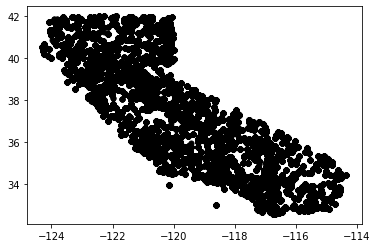

In [11]:
plt.plot(dt2['X'], dt2['Y'], 'ok',markersize=5)

/home/erik_ni1991/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


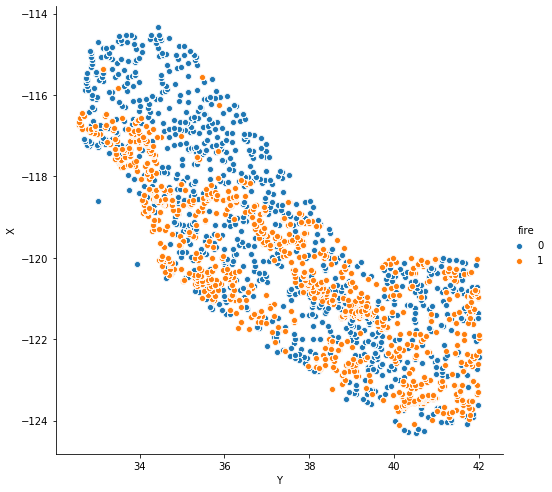

In [12]:
a=sns.pairplot(x_vars=['Y'],y_vars=['X'],data=dt2,hue='fire',size=7).fig.axes[0]



# 1. Variables Selection: TAVG, TMAX, TMIN, PRCP (760 obs)



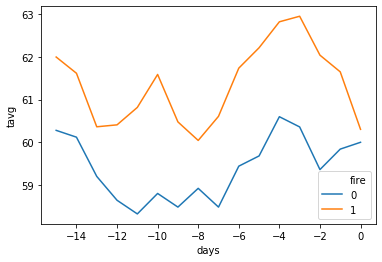

In [13]:
temp=dt2.dropna(subset=['TMAX','TMIN','TAVG','PRCP'])
t=temp>>group_by(temp.fire,temp.days)>>summarize(tavg=X.TAVG.mean(),prcpavg=X.PRCP.mean())
sns.lineplot(x='days',y='tavg',data=t,hue='fire')

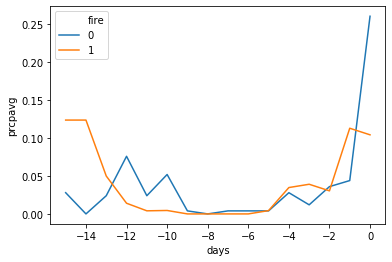

In [14]:
sns.lineplot(x='days',y='prcpavg',data=t,hue='fire')

In [15]:
temp_dt=temp.iloc[:,[11,14,15,16,17,19]]  
from sklearn import preprocessing
X = preprocessing.scale(temp_dt.iloc[:,0:4])
X

array([[-0.18746806,  1.25539726,  1.15164187,  1.54770903],
       [-0.18746806,  0.85905209,  0.57250067,  1.3319411 ],
       [-0.18746806,  0.36362062, -0.33757836,  1.22405713],
       ...,
       [-0.18746806, -0.03272455,  0.24156284,  0.03733353],
       [-0.18746806,  0.16544803,  0.3242973 , -0.07055043],
       [-0.18746806,  0.26453433,  0.15882839,  0.46886939]])

## 1-1. K-means

For n_clusters = 2 The average silhouette_score is : 0.48847922361249635
For n_clusters = 3 The average silhouette_score is : 0.47661373145040176
For n_clusters = 4 The average silhouette_score is : 0.38450981470607776
For n_clusters = 5 The average silhouette_score is : 0.3567847934963993


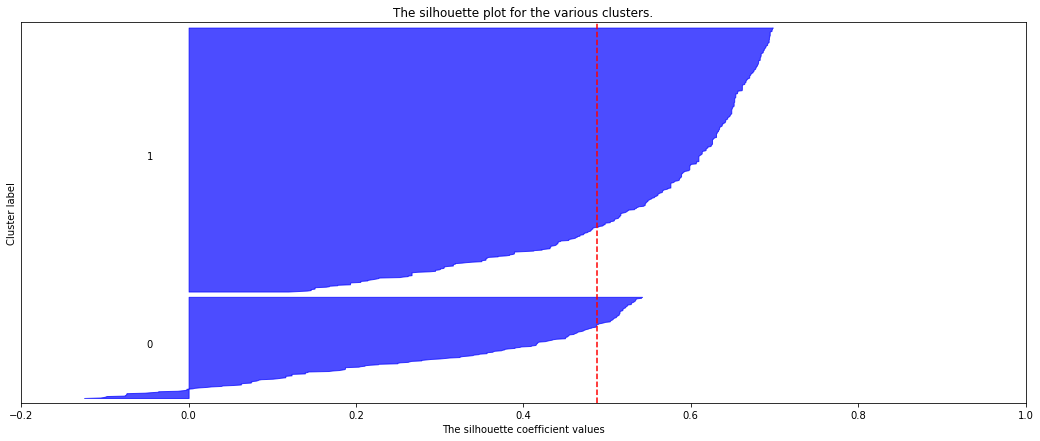

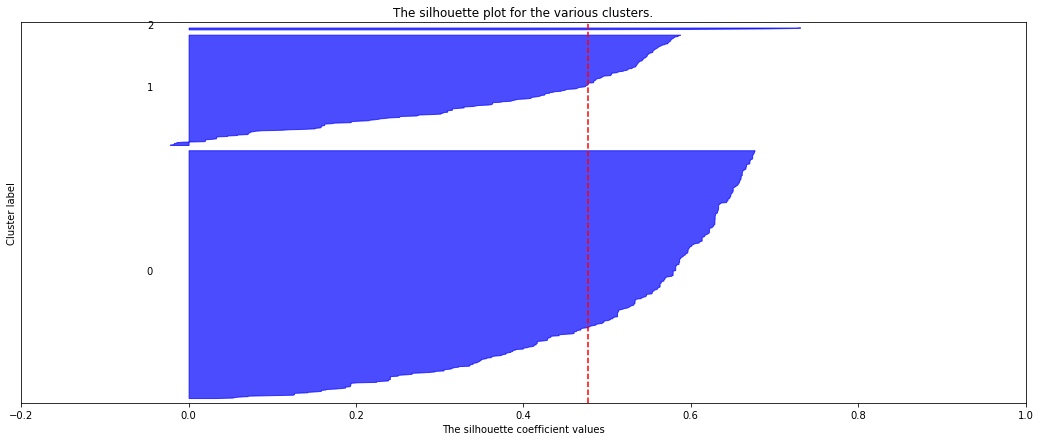

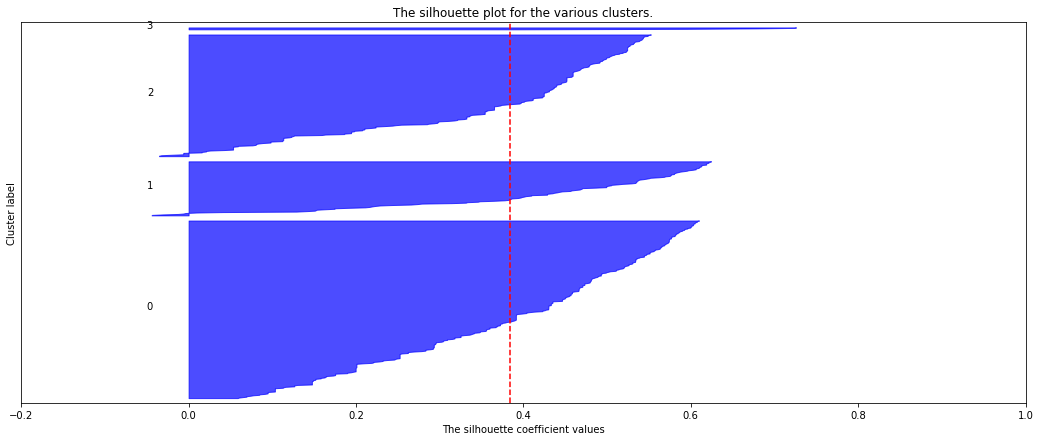

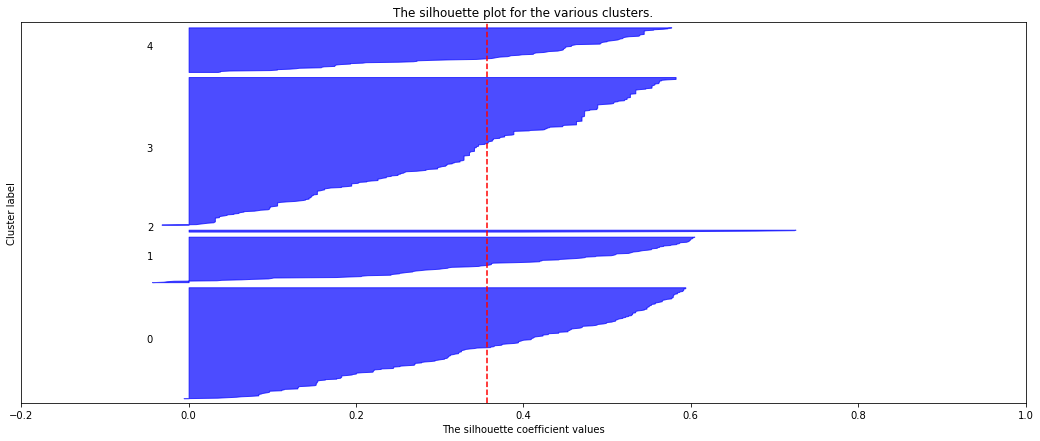

In [16]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    
    fig = plt.figure()
    fig.set_size_inches(18, 7)
    plt.xlim([-0.2, 1])

    plt.ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor='blue', edgecolor='blue', alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10 

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
temp_dt["Cluster"]=kmeans.predict(X)
kmeans.fit(X)

/home/erik_ni1991/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
temp_table = temp_dt.fire.groupby([temp_dt.Cluster, temp_dt.fire]).size().unstack().fillna(0).astype(int)
accuracy(temp_table)
temp_table

56.71052631578948


fire,0,1
Cluster,,
0,141,70
1,259,290


## 1-2. KNN 

In [20]:
y=temp_dt['fire']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train,y_train) 
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23 16]
 [19 18]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        39
           1       0.53      0.49      0.51        37

    accuracy                           0.54        76
   macro avg       0.54      0.54      0.54        76
weighted avg       0.54      0.54      0.54        76



Text(0, 0.5, 'Mean Error')

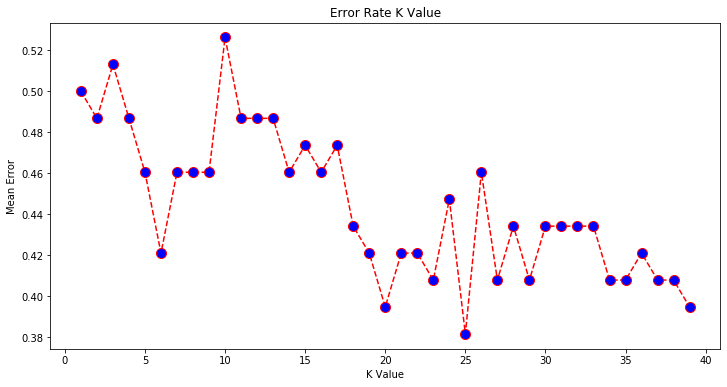

In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

## 1-3. Logistic Regression 

In [23]:
X = preprocessing.scale(temp_dt.iloc[:,0:2])
y = temp['fire']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)
model = logreg()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[32  6]
 [26 12]]
              precision    recall  f1-score   support

           0       0.55      0.84      0.67        38
           1       0.67      0.32      0.43        38

    accuracy                           0.58        76
   macro avg       0.61      0.58      0.55        76
weighted avg       0.61      0.58      0.55        76



/home/erik_ni1991/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.687857
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   fire   No. Observations:                  684
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                            2
Date:                Tue, 28 May 2019   Pseudo R-squ.:                0.005177
Time:                        21:15:50   Log-Likelihood:                -470.49
converged:                       True   LL-Null:                       -472.94
Covariance Type:            nonrobust   LLR p-value:                   0.08643
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1177      0.077     -1.531      0.126      -0.268       0.033
x1             0.0355      0.

In [25]:
print('RMSE:', sm.tools.eval_measures.rmse(y_test,y_pred))

RMSE: 0.6488856845230502


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   fire   No. Observations:                  684
Model:                            GLM   Df Residuals:                      681
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -470.49
Date:                Tue, 28 May 2019   Deviance:                       940.99
Time:                        21:15:53   Pearson chi2:                     684.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1177      0.077     -1.531      0.1

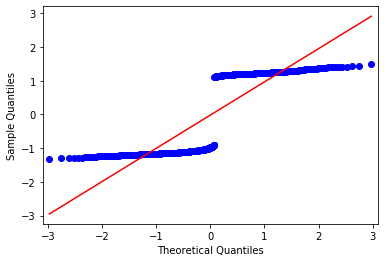

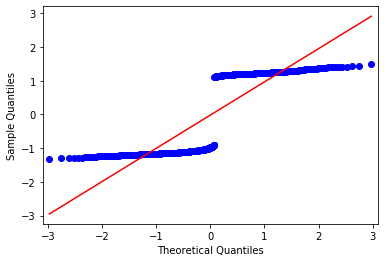

In [26]:
logit_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())
resid = logit_results.resid_deviance.copy()
graphics.gofplots.qqplot(resid, line='r')

# 2. Variables Selection: Wind, PRCP, TMAX (1574obs )

AxesSubplot(0.125,0.125;0.775x0.755)


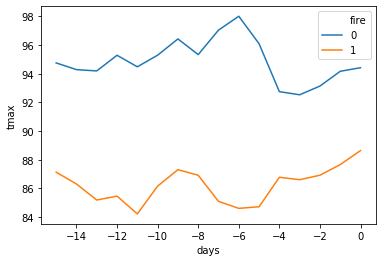

In [27]:
from dfply import *
pat=dt2.dropna(subset=['AWND','PRCP','TMAX'])
t=pat>>group_by(pat.fire,pat.days)>>summarize(tmax=X.TMAX.mean(),prcpavg=X.PRCP.mean(),wavg=X.AWND.mean())
print(sns.lineplot(x='days',y='tmax',data=t,hue='fire'))

AxesSubplot(0.125,0.125;0.775x0.755)


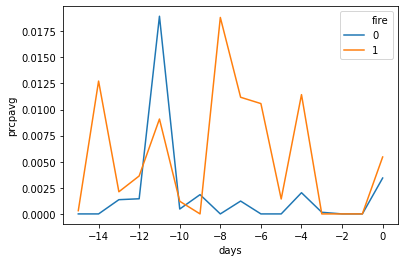

In [28]:
print(sns.lineplot(x='days',y='prcpavg',data=t,hue='fire'))

AxesSubplot(0.125,0.125;0.775x0.755)


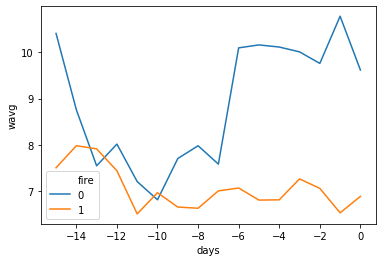

In [29]:
print(sns.lineplot(x='days',y='wavg',data=t,hue='fire'))

## 2-1. K-means

In [30]:
pat_dt=pat.iloc[:,[10,11,15,19]]  
X = preprocessing.scale(pat_dt.iloc[:,0:3])

For n_clusters = 2 , the average silhouette_score is : 0.8444513211383117


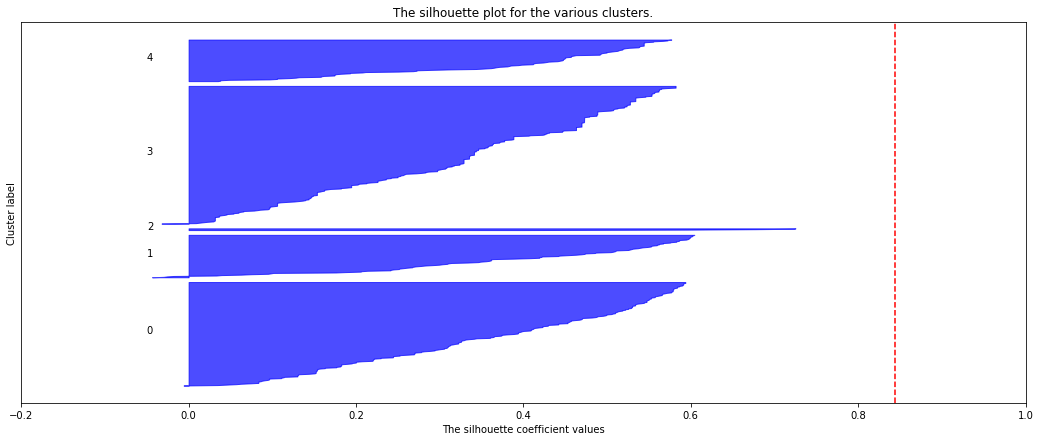

In [31]:
fig = plt.figure()
fig.set_size_inches(18, 7)
plt.xlim([-0.2, 1])

kmeans = KMeans(n_clusters=2, random_state=10)
kmeans_labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, kmeans_labels)
print("For n_clusters =", 2,
          ", the average silhouette_score is :", silhouette_avg)
for i in range(n_clusters):
    
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor='blue', edgecolor='blue', alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])
plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [32]:
pat_dt["Cluster"]=kmeans.predict(X)
pat_table = pat_dt.fire.groupby([pat_dt.Cluster, pat_dt.fire]).size().unstack().fillna(0).astype(int)
accuracy(pat_table)
pat_table

65.75603557814486


/home/erik_ni1991/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


fire,0,1
Cluster,,
0,1029,535
1,4,6


## 2-2. KNN 

In [33]:
y=pat_dt['fire']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train,y_train) 
y_pred = classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       102
           1       0.65      0.64      0.65        56

    accuracy                           0.75       158
   macro avg       0.73      0.73      0.73       158
weighted avg       0.75      0.75      0.75       158



## 2-3. Logistic Regression

In [34]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)
model = logreg()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

logit_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

[[92 10]
 [43 13]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       102
           1       0.57      0.23      0.33        56

    accuracy                           0.66       158
   macro avg       0.62      0.57      0.55       158
weighted avg       0.64      0.66      0.62       158

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   fire   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1412
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -806.17
Date:                Tue, 28 May 2019   Deviance:                       1612.3
Time:                        21:16:09   Pearson chi2:                 1.34e+03
No. Iterations:       

/home/erik_ni1991/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


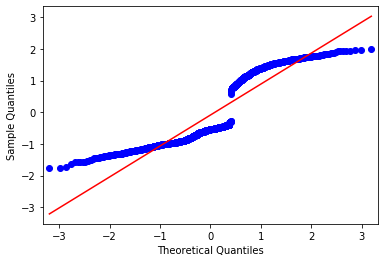

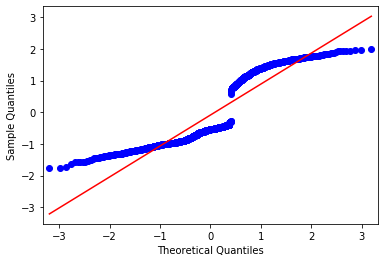

In [35]:
resid = logit_results.resid_deviance.copy()
graphics.gofplots.qqplot(resid, line='r')

In [36]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print('RMSE:', sm.tools.eval_measures.rmse(y_test,y_pred))

Optimization terminated successfully.
         Current function value: 0.569329
         Iterations 6
RMSE: 0.5791744452016884
